## Investment and Portfolio Management - Group Project 
### Part 1: Index Replication *[15 points]*
In this part, you will **replicate a stock market index of your choice (must be different from other groups)** using **Yahoo! Finance data from 2021-01-01 to 2021-11-30**. You will have to complete the following tasks:
1. Construct the following indices using the index constituents *[12 points]*:
    * **Price-weighted (PW) index** *[4 points]*;
    * **Value-weighted (VW) index** *[4 points]*;
    * **Equal-weighted (EW) index** *[4 points]*.
2. Plot the **original index** and the **three constructed indices (initial value of 100)** *[3 points]*.

## 指數: Deutscher Aktienindex DAX 30 Index

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
start_date = '2021-01-01'
end_date = '2021-12-01'
idx = '^GDAXI'

Index = yf.download(idx,
interval="1d", # daily frequency
start=start_date, end=end_date) 

Index.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-24,15942.280273,15974.299805,15740.599609,15878.389648,15878.389648,87886600
2021-11-25,15928.379883,15962.540039,15865.410156,15917.980469,15917.980469,57275800
2021-11-26,15383.900391,15540.290039,15244.459961,15257.040039,15257.040039,133308100
2021-11-29,15418.280273,15441.910156,15237.870117,15280.860352,15280.860352,95660000
2021-11-30,15117.629883,15280.040039,15015.419922,15100.129883,15100.129883,152644300


In [3]:
# only retain "Adj Close" Column
Index = pd.DataFrame(Index['Adj Close'].rename(idx)) # the actual index of DAX30
Index.head(3)

,^GDAXI
Date,
2021-01-04,13726.740234
2021-01-05,13651.219727
2021-01-06,13891.969727


[DAX 30 成分股](https://en.wikipedia.org/wiki/DAX)

In [4]:
page = pd.read_html('https://en.wikipedia.org/wiki/DAX')


In [5]:
type(page)
len(page)

9

In [6]:
page[3].head() # the data we want 

,Unnamed: 0,Company,Prime Standard Sector,Ticker symbol,Index weighting (%)1,Employees,Founded
0,NaN,Adidas,Footwear,ADS.DE,4.91,"57,016 (2018)",1924
1,NaN,Allianz,Financial Services,ALV.DE,7.22,"142,460 (2018)",1890
2,NaN,BASF,Basic Materials,BAS.DE,4.89,"122,404 (2018)",1865
3,NaN,Bayer,Healthcare,BAYN.DE,5.52,"110,838 (2018)",1863
4,NaN,BMW,Automobile,BMW.DE,2.00,"134,682 (2018)",1916


In [7]:
constit = page[3]['Ticker symbol']
constit.head(3)

0    ADS.DE
1    ALV.DE
2    BAS.DE
Name: Ticker symbol, dtype: object

[OutStanding VS Float share](https://www.investopedia.com/ask/answers/062315/what-difference-between-shares-outstanding-and-floating-stock.asp)

- Outstanding shares include those held by shareholders and company insiders. 
- Floating shares indicate the number of shares actually available for trading.

In [8]:
for i in constit:
    print(i)
    prc = yf.download(i, interval='1d', start=start_date, end=end_date)
    prc = pd.DataFrame(prc['Adj Close'])
    prc.columns = [i]

    try:
        df_prc = pd.concat([df_prc, prc], axis=1)
    except:
        df_prc = prc # only executes in the first i
    
    stk = yf.Ticker(i) # get the info of a particular stock
    try:
        stk.info['floatShares']
    except:
        stk.info['floatShares'] = None
        
    try:
        stk.info['sharesOutstanding']
    except:
        stk.info['sharesOutstanding'] = None

# calculate the market value of each constituent stocks
if stk.info['floatShares']:
    mcap = prc * stk.info['floatShares']
elif stk.info['sharesOutstanding']:
    mcap = prc * stk.info['sharesOutstanding']
else:
    mcap = prc * (stk.info['marketCap']/stk.info['previousClose'])

try:
    df_mcap = pd.concat([df_mcap, mcap], axis=1)
except:
    df_mcap = mcap # only executes in the first i


ADS.DE
[*********************100%***********************]  1 of 1 completed
ALV.DE
[*********************100%***********************]  1 of 1 completed
BAS.DE
[*********************100%***********************]  1 of 1 completed
BAYN.DE
[*********************100%***********************]  1 of 1 completed
BMW.DE
[*********************100%***********************]  1 of 1 completed
CON.DE
[*********************100%***********************]  1 of 1 completed
1COV.DE
[*********************100%***********************]  1 of 1 completed
DAI.DE
[*********************100%***********************]  1 of 1 completed
DHER.DE
[*********************100%***********************]  1 of 1 completed
DBK.DE
[*********************100%***********************]  1 of 1 completed
DB1.DE
[*********************100%***********************]  1 of 1 completed
DPW.DE
[*********************100%***********************]  1 of 1 completed
DTE.DE
[*********************100%***********************]  1 of 1 completed
DWNI.DE
[

In [9]:
df_prc.shape

(234, 30)

In [10]:
df_prc.head(3)

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,292.307343,190.011627,61.853455,47.473862,68.613251,117.900002,50.551113,55.889412,136.550003,8.791,...,209.081650,142.350006,210.118011,229.031296,35.022049,103.588997,114.593018,30.129999,145.024002,57.650417
2021-01-05,286.568085,188.060059,61.386387,47.652042,67.658432,116.949997,50.140442,55.879585,144.100006,8.850,...,207.607162,141.755844,210.316696,228.261765,34.291409,103.313599,114.359184,30.090000,143.812866,57.922352
2021-01-06,288.646088,197.837112,64.217407,49.535011,67.782555,115.699997,51.528889,55.427757,138.350006,9.380,...,215.962555,141.062668,205.647415,236.630386,35.616302,103.746368,118.743378,30.750000,144.027756,55.591476


In [11]:
# Price-weighted (PW) index
PWI = df_prc.sum(axis=1) # 將每天成分股的股價相加
PWI = pd.DataFrame(PWI.rename("PWI"))
PWI.shape

(234, 1)

In [12]:
df_mcap.shape # 共 231 個交易日每天的市值加總

(234, 1)

In [13]:
df_mcap.columns

Index(['VNA.DE'], dtype='object')

In [14]:
# Value-Weighted Index (VWI)
VWI = pd.DataFrame(df_mcap).rename(columns={'VNA.DE':'VWI'})
VWI

,VWI
Date,
2021-01-04,3.316382e+10
2021-01-05,3.332026e+10
2021-01-06,3.197940e+10
2021-01-07,3.177828e+10
2021-01-08,3.219170e+10
...,...
2021-11-24,2.985586e+10
2021-11-25,3.005144e+10
2021-11-26,2.859604e+10


In [15]:
df_prc.tail(3)

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-26,253.350006,191.440002,57.910000,45.540001,85.510002,97.360001,51.220001,83.160004,116.949997,10.700,...,281.107910,223.000000,166.750000,236.100006,34.110001,115.220001,145.240005,24.180000,163.940002,49.709999
2021-11-29,254.300003,192.080002,57.980000,45.320000,85.779999,93.250000,50.680000,68.868690,119.300003,10.678,...,282.452911,219.600006,167.649994,239.100006,35.020000,116.800003,144.559998,24.090000,164.520004,49.169998
2021-11-30,255.550003,192.440002,57.880001,44.520000,84.980003,94.699997,49.840000,69.035042,117.699997,10.660,...,280.709381,218.899994,164.949997,238.350006,34.150002,113.180000,141.279999,23.440001,161.660004,49.000000


In [16]:
# Equal-Weighted Index (EWI)
EWI = df_prc.pct_change().mean(axis=1)
EWI[0] = 0
EWI = EWI + 1 # 轉變為實際報酬
EWI = EWI.cumprod()
EWI = pd.DataFrame(EWI.rename('EWI'))
EWI.tail()

# 2021.11.26: EWI: 每個成分股的權重都是 1/n，所以整個指數每日的報酬就是所有成分股每日報酬的平均

,EWI
Date,
2021-11-24,1.105706
2021-11-25,1.107981
2021-11-26,1.062686
2021-11-29,1.055441
2021-11-30,1.042451


In [17]:
egg = df_prc.copy()
egg.pct_change().mean(axis=1)

egg[0] = 0
egg2 = egg + 1
egg2

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE,0
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,293.307343,191.011627,62.853455,48.473862,69.613251,118.900002,51.551113,56.889412,137.550003,9.791,...,143.350006,211.118011,230.031296,36.022049,104.588997,115.593018,31.129999,146.024002,58.650417,1
2021-01-05,287.568085,189.060059,62.386387,48.652042,68.658432,117.949997,51.140442,56.879585,145.100006,9.850,...,142.755844,211.316696,229.261765,35.291409,104.313599,115.359184,31.090000,144.812866,58.922352,1
2021-01-06,289.646088,198.837112,65.217407,50.535011,68.782555,116.699997,52.528889,56.427757,139.350006,10.380,...,142.062668,206.647415,237.630386,36.616302,104.746368,119.743378,31.750000,145.027756,56.591476,1
2021-01-07,286.479584,197.210800,66.208740,51.392220,68.811195,118.400002,53.995556,57.763603,135.399994,10.583,...,143.201477,207.442200,234.167496,36.908558,103.802139,122.101105,32.860001,145.750519,56.241844,1
2021-01-08,293.010498,197.832611,66.370781,50.602432,68.305145,120.099998,53.976002,57.665379,136.550003,10.519,...,142.359741,209.727173,234.359894,38.652355,105.434860,121.808823,34.430000,144.051025,56.960529,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,269.399994,204.100006,62.889999,48.470001,93.489998,105.720001,56.200001,89.370003,119.300003,12.450,...,216.699997,188.149994,254.550003,33.730000,119.940002,152.940002,24.780001,173.380005,52.900002,1
2021-11-25,268.950012,203.649994,62.610001,48.424999,92.129997,104.900002,55.919998,89.379997,114.699997,12.570,...,218.300003,189.050003,254.149994,35.959999,120.820000,154.580002,25.510000,173.360001,53.240002,1
2021-11-26,254.350006,192.440002,58.910000,46.540001,86.510002,98.360001,52.220001,84.160004,117.949997,11.700,...,224.000000,167.750000,237.100006,35.110001,116.220001,146.240005,25.180000,164.940002,50.709999,1


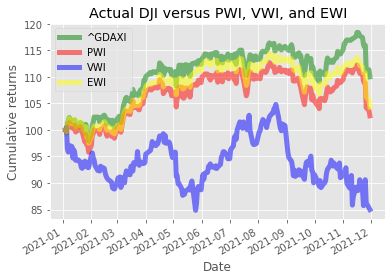

In [18]:
# Plotting
import matplotlib.pyplot as plt

TS = Index.join([PWI,VWI,EWI]) # compare the actual data and the three different weighted index
TS = TS.divide(TS.iloc[0] / 100) # 設定初始值為 100

plt.style.use('ggplot')
fig = TS.plot(color=["green","red","blue","yellow"],alpha=0.5,linewidth=5)
plt.rcParams["figure.figsize"] = (10, 10) 

plt.title('Actual DJI versus PWI, VWI, and EWI')
plt.legend(loc='best')
plt.ylabel('Cumulative returns')
plt.show()

----

### 取得 DAX 30 成分股美日報酬

In [19]:
part3_df = df_prc.copy()

In [20]:
part3_df.tail() # 30 檔成分股每天的價格

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-24,268.399994,203.100006,61.889999,47.470001,92.489998,104.720001,55.200001,88.370003,118.300003,11.450,...,290.871735,215.699997,187.149994,253.550003,32.730000,118.940002,151.940002,23.780001,172.380005,51.900002
2021-11-25,267.950012,202.649994,61.610001,47.424999,91.129997,103.900002,54.919998,88.379997,113.699997,11.570,...,292.316345,217.300003,188.050003,253.149994,34.959999,119.820000,153.580002,24.510000,172.360001,52.240002
2021-11-26,253.350006,191.440002,57.910000,45.540001,85.510002,97.360001,51.220001,83.160004,116.949997,10.700,...,281.107910,223.000000,166.750000,236.100006,34.110001,115.220001,145.240005,24.180000,163.940002,49.709999
2021-11-29,254.300003,192.080002,57.980000,45.320000,85.779999,93.250000,50.680000,68.868690,119.300003,10.678,...,282.452911,219.600006,167.649994,239.100006,35.020000,116.800003,144.559998,24.090000,164.520004,49.169998
2021-11-30,255.550003,192.440002,57.880001,44.520000,84.980003,94.699997,49.840000,69.035042,117.699997,10.660,...,280.709381,218.899994,164.949997,238.350006,34.150002,113.180000,141.279999,23.440001,161.660004,49.000000


In [21]:
part3_df.shape

(234, 30)

In [22]:
# 計算 30 檔成分股每日的 return
constit_ret = part3_df.pct_change().dropna()

In [23]:
constit_ret.head(3)

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,-0.019634,-0.010271,-0.007551,0.003753,-0.013916,-0.008058,-0.008124,-0.000176,0.055291,0.006711,...,-0.007052,-0.004174,0.000946,-0.003360,-0.020862,-0.002659,-0.002041,-0.001328,-0.008351,0.004717
2021-01-06,0.007251,0.051989,0.046118,0.039515,0.001835,-0.010688,0.027691,-0.008086,-0.039903,0.059887,...,0.040246,-0.004890,-0.022201,0.036662,0.038636,0.004189,0.038337,0.021934,0.001494,-0.040241
2021-01-07,-0.010970,-0.008220,0.015437,0.017305,0.000423,0.014693,0.028463,0.024101,-0.028551,0.021642,...,0.011834,0.008073,0.003865,-0.014634,0.008206,-0.009101,0.019856,0.036098,0.005018,-0.006289


In [24]:
constit_ret.tail(3)

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-26,-0.054488,-0.055317,-0.060055,-0.039747,-0.061670,-0.062945,-0.067371,-0.059063,0.028584,-0.075194,...,-0.038344,0.026231,-0.113268,-0.067351,-0.024313,-0.038391,-0.054304,-0.013464,-0.048851,-0.048430
2021-11-29,0.003750,0.003343,0.001209,-0.004831,0.003157,-0.042214,-0.010543,-0.171853,0.020094,-0.002056,...,0.004785,-0.015247,0.005397,0.012706,0.026678,0.013713,-0.004682,-0.003722,0.003538,-0.010863
2021-11-30,0.004915,0.001874,-0.001725,-0.017652,-0.009326,0.015550,-0.016575,0.002415,-0.013412,-0.001686,...,-0.006173,-0.003188,-0.016105,-0.003137,-0.024843,-0.030993,-0.022690,-0.026982,-0.017384,-0.003457


In [25]:
constit_ret.shape

(233, 30)

### 取得 DAX 30 每日報酬

In [26]:
start_date = '2021-01-01'
end_date = '2021-12-01'
idx = '^GDAXI'

Index = yf.download(idx,
interval="1d", # daily frequency
start=start_date, end=end_date) 

Index.tail()
Index.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)


[*********************100%***********************]  1 of 1 completed


In [27]:
idx_ret = Index['Adj Close'].pct_change().dropna()

In [28]:
type(idx_ret)

pandas.core.series.Series

In [29]:
idx_ret.head(3)

Date
2021-01-05   -0.005502
2021-01-06    0.017636
2021-01-07    0.005490
Name: Adj Close, dtype: float64

In [30]:
idx_ret.tail(3)

Date
2021-11-26   -0.041522
2021-11-29    0.001561
2021-11-30   -0.011827
Name: Adj Close, dtype: float64

In [31]:
type(idx_ret) # 確認已經將其他 columns 刪除

pandas.core.series.Series

In [32]:
idx_ret.shape

(233,)

## 取得 risk-free rate (Germany 10 year bond yield)

In [33]:
rf = pd.read_csv("Germany-10Y-yield.csv")
rf.drop(columns=['Open', 'High', 'Low'], inplace=True)

In [34]:
# change percentage point string to float
i = 0
for r in rf['Close']:
    p2f = float(r.strip('%')) / 100
    rf.loc[i, 'Close'] = p2f
    i += 1

In [35]:
rf.head(3)

,Date,Close
0,11/30/2021,0.00349
1,11/29/2021,0.00316
2,11/26/2021,0.00334


In [36]:
rev_rf = rf.iloc[::-1].reset_index(drop=True)

In [37]:
rev_rf.head(3)

,Date,Close
0,01/04/2021,0.00605
1,01/05/2021,0.00571
2,01/06/2021,0.00552


In [38]:
rev_rf['Close'] = rev_rf['Close'].pct_change()
rev_rf.dropna(inplace=True)

In [39]:
rev_rf.shape

(235, 2)

In [40]:
rev_rf.head(3)

,Date,Close
1,01/05/2021,-0.056198
2,01/06/2021,-0.033275
3,01/07/2021,0.000000


In [41]:
import datetime as dt
tmp = pd.DataFrame()
i = 0
for row in rev_rf['Date']:
    row_fmt = dt.datetime.strptime(row,'%m/%d/%Y').strftime('%m-%d-%Y')
    tmp.loc[i, 'Date'] = row_fmt
    i += 1  
tmp.index += 1 # shift the index by 1 so that it corresponds to rf
print(tmp)
type(tmp)

           Date
1    01-05-2021
2    01-06-2021
3    01-07-2021
4    01-08-2021
5    01-11-2021
..          ...
231  11-24-2021
232  11-25-2021
233  11-26-2021
234  11-29-2021
235  11-30-2021

[235 rows x 1 columns]


pandas.core.frame.DataFrame

In [42]:
rev_rf.drop(columns=['Date'], inplace=True)
print(rev_rf.head())

      Close
1 -0.056198
2 -0.033275
3  0.000000
4 -0.061594
5 -0.046332


In [43]:
rf = pd.concat([rev_rf, tmp], axis=1)
rf

,Close,Date
1,-0.056198,01-05-2021
2,-0.033275,01-06-2021
3,0.000000,01-07-2021
4,-0.061594,01-08-2021
5,-0.046332,01-11-2021
...,...,...
231,0.027397,11-24-2021
232,0.106667,11-25-2021
233,0.341365,11-26-2021
234,-0.053892,11-29-2021


In [44]:
rf.set_index('Date', inplace=True)

In [45]:
rf.tail(3)

,Close
Date,
11-26-2021,0.341365
11-29-2021,-0.053892
11-30-2021,0.104430


In [46]:
## 找出債券多的日期:

In [47]:
constit_ret.index = constit_ret.index.date

In [48]:
constit_l = []
rf_l = []

for i in constit_ret.index:
    i = i.strftime("%m-%d-%Y") # change datetime to string
    constit_l.append(i)
for j in rf.index:
    rf_l.append(j)


In [55]:
# 十年期公債的開市日比 DAX30 多兩天
len(rf_l) - len(constit_l) 

2

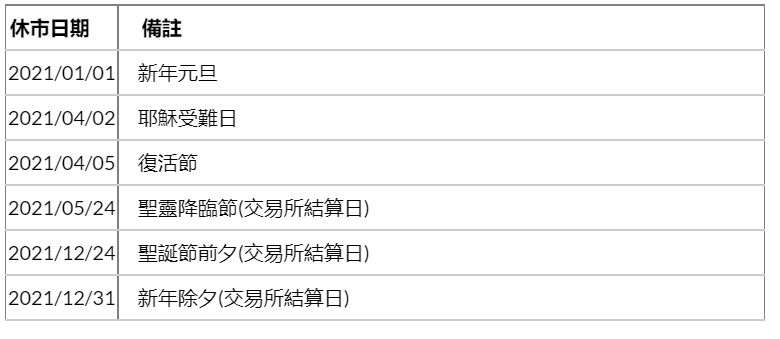

In [56]:
list(set(constit_l) - set(rf_l)) + list(set(rf_l) - set(constit_l))

['04-04-2021', '05-24-2021']

In [51]:
idx_ret.head()

Date
2021-01-05   -0.005502
2021-01-06    0.017636
2021-01-07    0.005490
2021-01-08    0.005820
2021-01-11   -0.008034
Name: Adj Close, dtype: float64

In [84]:
constit_ret.rename_axis('Date')

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,-0.019634,-0.010271,-0.007551,0.003753,-0.013916,-0.008058,-0.008124,-0.000176,0.055291,0.006711,...,-0.007052,-0.004174,0.000946,-0.003360,-0.020862,-0.002659,-0.002041,-0.001328,-0.008351,0.004717
2021-01-06,0.007251,0.051989,0.046118,0.039515,0.001835,-0.010688,0.027691,-0.008086,-0.039903,0.059887,...,0.040246,-0.004890,-0.022201,0.036662,0.038636,0.004189,0.038337,0.021934,0.001494,-0.040241
2021-01-07,-0.010970,-0.008220,0.015437,0.017305,0.000423,0.014693,0.028463,0.024101,-0.028551,0.021642,...,0.011834,0.008073,0.003865,-0.014634,0.008206,-0.009101,0.019856,0.036098,0.005018,-0.006289
2021-01-08,0.022877,0.003169,0.002485,-0.015673,-0.007463,0.014480,-0.000369,-0.001730,0.008557,-0.006679,...,-0.007647,-0.005919,0.011068,0.000825,0.048562,0.015882,-0.002414,0.049278,-0.011741,0.013010
2021-01-11,-0.010844,-0.011908,-0.015019,-0.009903,-0.016882,-0.023510,-0.008121,-0.009360,-0.023608,0.000420,...,-0.000907,0.015061,-0.023322,-0.008656,-0.010867,-0.001319,-0.000161,-0.003889,-0.010651,-0.002083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,-0.012691,-0.000738,-0.016839,-0.024956,-0.020648,-0.019292,-0.024735,-0.018547,-0.005882,0.024150,...,-0.001368,0.001393,0.020725,0.016436,0.007077,-0.005019,-0.009130,0.002952,-0.027750,0.050135
2021-11-25,-0.001677,-0.002216,-0.004524,-0.000948,-0.014704,-0.007830,-0.005073,0.000113,-0.038884,0.010480,...,0.004966,0.007418,0.004809,-0.001578,0.068133,0.007399,0.010794,0.030698,-0.000116,0.006551
2021-11-26,-0.054488,-0.055317,-0.060055,-0.039747,-0.061670,-0.062945,-0.067371,-0.059063,0.028584,-0.075194,...,-0.038344,0.026231,-0.113268,-0.067351,-0.024313,-0.038391,-0.054304,-0.013464,-0.048851,-0.048430


In [87]:
df = constit_ret.merge(rf['Close'].to_frame(), on='Date', how='right')

KeyError: 'Date'

In [80]:
df

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE,Close
2021-01-05,-0.019634,-0.010271,-0.007551,0.003753,-0.013916,-0.008058,-0.008124,-0.000176,0.055291,0.006711,...,-0.004174,0.000946,-0.003360,-0.020862,-0.002659,-0.002041,-0.001328,-0.008351,0.004717,NaN
2021-01-06,0.007251,0.051989,0.046118,0.039515,0.001835,-0.010688,0.027691,-0.008086,-0.039903,0.059887,...,-0.004890,-0.022201,0.036662,0.038636,0.004189,0.038337,0.021934,0.001494,-0.040241,NaN
2021-01-07,-0.010970,-0.008220,0.015437,0.017305,0.000423,0.014693,0.028463,0.024101,-0.028551,0.021642,...,0.008073,0.003865,-0.014634,0.008206,-0.009101,0.019856,0.036098,0.005018,-0.006289,NaN
2021-01-08,0.022877,0.003169,0.002485,-0.015673,-0.007463,0.014480,-0.000369,-0.001730,0.008557,-0.006679,...,-0.005919,0.011068,0.000825,0.048562,0.015882,-0.002414,0.049278,-0.011741,0.013010,NaN
2021-01-11,-0.010844,-0.011908,-0.015019,-0.009903,-0.016882,-0.023510,-0.008121,-0.009360,-0.023608,0.000420,...,0.015061,-0.023322,-0.008656,-0.010867,-0.001319,-0.000161,-0.003889,-0.010651,-0.002083,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,-0.012691,-0.000738,-0.016839,-0.024956,-0.020648,-0.019292,-0.024735,-0.018547,-0.005882,0.024150,...,0.001393,0.020725,0.016436,0.007077,-0.005019,-0.009130,0.002952,-0.027750,0.050135,NaN
2021-11-25,-0.001677,-0.002216,-0.004524,-0.000948,-0.014704,-0.007830,-0.005073,0.000113,-0.038884,0.010480,...,0.007418,0.004809,-0.001578,0.068133,0.007399,0.010794,0.030698,-0.000116,0.006551,NaN
2021-11-26,-0.054488,-0.055317,-0.060055,-0.039747,-0.061670,-0.062945,-0.067371,-0.059063,0.028584,-0.075194,...,0.026231,-0.113268,-0.067351,-0.024313,-0.038391,-0.054304,-0.013464,-0.048851,-0.048430,NaN
2021-11-29,0.003750,0.003343,0.001209,-0.004831,0.003157,-0.042214,-0.010543,-0.171853,0.020094,-0.002056,...,-0.015247,0.005397,0.012706,0.026678,0.013713,-0.004682,-0.003722,0.003538,-0.010863,NaN


In [72]:
df.iloc[1, -1]

nan

## Linear Regression

In [53]:
import statsmodels.formula.api as smf
Y = df['']

KeyError: ''